<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.patches import Polygon
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as plticker

import seaborn as sns
import scipy as sp
from scipy import signal
from scipy.interpolate import griddata

from datetime import timedelta, datetime
import warnings
from IPython.display import display, Math
warnings.filterwarnings('ignore')

# Importing Data

## Get Station Number as a Function of Longitudes and Latitudes

In [3]:
lon_and_lat = np.genfromtxt('AllStations_temperature_h_2017.dat', delimiter=" ", max_rows=2)
longitudes = lon_and_lat[0][~np.isnan(lon_and_lat[0])]
latitudes = lon_and_lat[1][~np.isnan(lon_and_lat[1])]

indices = list(zip(np.array(longitudes), np.array(latitudes)))
indices.insert(0, "time")

Dictionary that provides the mapping:

In [4]:
location_to_station_num = dict(zip(indices[1::], np.arange(0,37)))
station_num_to_location = dict(zip(np.arange(0,37), indices[1::]))

## Import Data

In [5]:
winter_df_2017 = pd.read_pickle('Dataframes/winter_2017.pkl')
summer_df_2017 = pd.read_pickle('Dataframes/summer_2017.pkl')
winter_df_2016 = pd.read_pickle('Dataframes/winter_2016.pkl')
summer_df_2016 = pd.read_pickle('Dataframes/summer_2016.pkl')
winter_df_2015 = pd.read_pickle('Dataframes/winter_2015.pkl')
summer_df_2015 = pd.read_pickle('Dataframes/summer_2015.pkl')
winter_df_2014 = pd.read_pickle('Dataframes/winter_2014.pkl')
summer_df_2014 = pd.read_pickle('Dataframes/summer_2014.pkl')
winter_df_2013 = pd.read_pickle('Dataframes/winter_2013.pkl')
summer_df_2013 = pd.read_pickle('Dataframes/summer_2013.pkl')
winter_df_2012 = pd.read_pickle('Dataframes/winter_2012.pkl')
summer_df_2012 = pd.read_pickle('Dataframes/summer_2012.pkl')
winter_df_2011 = pd.read_pickle('Dataframes/winter_2011.pkl')
summer_df_2011 = pd.read_pickle('Dataframes/summer_2011.pkl')
winter_df_2010 = pd.read_pickle('Dataframes/winter_2010.pkl')
summer_df_2010 = pd.read_pickle('Dataframes/summer_2010.pkl')

In [6]:
winter_dfs = [winter_df_2010, winter_df_2011, winter_df_2012, winter_df_2013,
             winter_df_2014, winter_df_2015, winter_df_2016, winter_df_2017]
summer_dfs = [summer_df_2010, summer_df_2011, summer_df_2012, summer_df_2013, 
             summer_df_2014, summer_df_2015, summer_df_2016, summer_df_2017]

In [7]:
winter_stations_2017 = np.array([location_to_station_num[winter_df_2017.columns[i]] for i in range(len(winter_df_2017.columns))])
summer_stations_2017 = np.array([location_to_station_num[summer_df_2017.columns[i]] for i in range(len(summer_df_2017.columns))])
winter_stations_2016 = np.array([location_to_station_num[winter_df_2016.columns[i]] for i in range(len(winter_df_2016.columns))])
summer_stations_2016 = np.array([location_to_station_num[summer_df_2016.columns[i]] for i in range(len(summer_df_2016.columns))])
winter_stations_2015 = np.array([location_to_station_num[winter_df_2015.columns[i]] for i in range(len(winter_df_2015.columns))])
summer_stations_2015 = np.array([location_to_station_num[summer_df_2015.columns[i]] for i in range(len(summer_df_2015.columns))])
winter_stations_2014 = np.array([location_to_station_num[winter_df_2014.columns[i]] for i in range(len(winter_df_2014.columns))])
summer_stations_2014 = np.array([location_to_station_num[summer_df_2014.columns[i]] for i in range(len(summer_df_2014.columns))])
winter_stations_2013 = np.array([location_to_station_num[winter_df_2013.columns[i]] for i in range(len(winter_df_2013.columns))])
summer_stations_2013 = np.array([location_to_station_num[summer_df_2013.columns[i]] for i in range(len(summer_df_2013.columns))])
winter_stations_2012 = np.array([location_to_station_num[winter_df_2012.columns[i]] for i in range(len(winter_df_2012.columns))])
summer_stations_2012 = np.array([location_to_station_num[summer_df_2012.columns[i]] for i in range(len(summer_df_2012.columns))])
winter_stations_2011 = np.array([location_to_station_num[winter_df_2011.columns[i]] for i in range(len(winter_df_2011.columns))])
summer_stations_2011 = np.array([location_to_station_num[summer_df_2011.columns[i]] for i in range(len(summer_df_2011.columns))])
winter_stations_2010 = np.array([location_to_station_num[winter_df_2010.columns[i]] for i in range(len(winter_df_2010.columns))])
summer_stations_2010 = np.array([location_to_station_num[summer_df_2010.columns[i]] for i in range(len(summer_df_2010.columns))])

In [8]:
winter_stations = [winter_stations_2010, winter_stations_2011, winter_stations_2012, winter_stations_2013, 
                  winter_stations_2014, winter_stations_2015, winter_stations_2016, winter_stations_2017]

summer_stations = [summer_stations_2010, summer_stations_2011, summer_stations_2012, summer_stations_2013, 
                  summer_stations_2014, summer_stations_2015, summer_stations_2016, summer_stations_2017]

In [9]:
summer_df_2011

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.604,...,236.579,236.639,236.641,236.619,236.357,236.574,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.4382,...,48.6701,48.4456,48.4683,48.4744,48.6568,48.4533,48.4865,48.4623,48.4359,48.4572
2011-06-01 01:00:02.879995,9.69,9.20,10.67,9.75,12.14,10.55,11.18,11.49,10.79,11.42,...,11.44,11.50,10.25,10.11,11.11,10.81,10.44,11.91,11.82,11.25
2011-06-01 01:59:57.120005,9.16,8.69,10.49,9.51,11.65,10.43,10.58,11.35,10.87,11.24,...,11.08,11.46,10.20,9.87,10.68,10.87,10.42,11.37,11.64,11.39
2011-06-01 03:00:00.000000,9.50,8.59,11.15,9.92,11.81,10.73,10.86,10.87,11.26,12.43,...,10.84,11.72,10.54,10.27,10.44,11.07,10.86,11.76,11.53,11.54
2011-06-01 04:00:02.879995,9.63,8.38,11.55,10.04,11.73,11.17,10.98,10.82,11.53,12.31,...,10.73,11.65,11.26,10.47,10.67,11.60,10.81,11.89,11.79,11.64
2011-06-01 04:59:57.120005,9.74,8.46,11.83,11.46,11.92,11.16,10.90,11.12,11.77,12.56,...,10.32,11.98,11.39,10.94,10.61,12.30,11.03,11.89,12.10,11.55
2011-06-01 06:00:00.000000,11.26,9.48,12.43,12.41,12.34,11.02,11.78,11.48,12.54,13.06,...,10.81,12.70,12.63,11.78,11.35,13.07,11.67,12.56,12.26,12.15
2011-06-01 07:00:02.879995,12.29,11.78,13.36,13.09,13.05,12.08,12.66,12.35,13.41,13.37,...,11.82,13.25,13.78,12.75,12.33,13.78,12.96,13.84,13.09,12.75
2011-06-01 07:59:57.120005,13.33,13.15,13.63,13.36,13.33,12.55,13.23,13.41,13.39,13.63,...,13.57,13.43,13.75,13.14,13.33,14.25,13.35,13.96,13.26,13.44
2011-06-01 09:00:00.000000,14.03,13.36,14.36,14.02,13.72,12.70,13.83,14.59,14.10,14.31,...,13.34,14.18,14.50,13.80,13.74,14.84,14.03,14.55,13.74,13.96


# Basic Plot

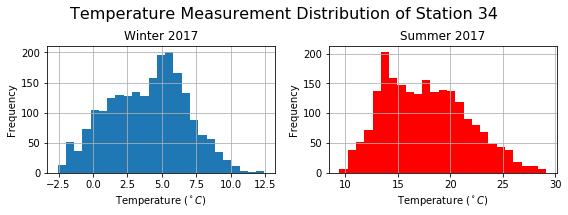

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].hist(winter_df_2017[station_num_to_location[34]], bins=25)
ax[1].hist(summer_df_2017[station_num_to_location[34]], bins=25, color='r')

props_wint = {'title': 'Winter 2017', 'xlabel': r'Temperature ($^\circ C$)',
        'ylabel': 'Frequency'}
props_sum = {'title': 'Summer 2017', 'xlabel': r'Temperature ($^\circ C$)',
        'ylabel': 'Frequency'}

ax[0].set(**props_wint)
ax[1].set(**props_sum)

ax[0].grid()
ax[1].grid()

fig.suptitle(r'Temperature Measurement Distribution of Station 34', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.80)

plt.savefig('plots/stat_34_temp_mes.png', dpi=300)
plt.show()

# Violin Plots

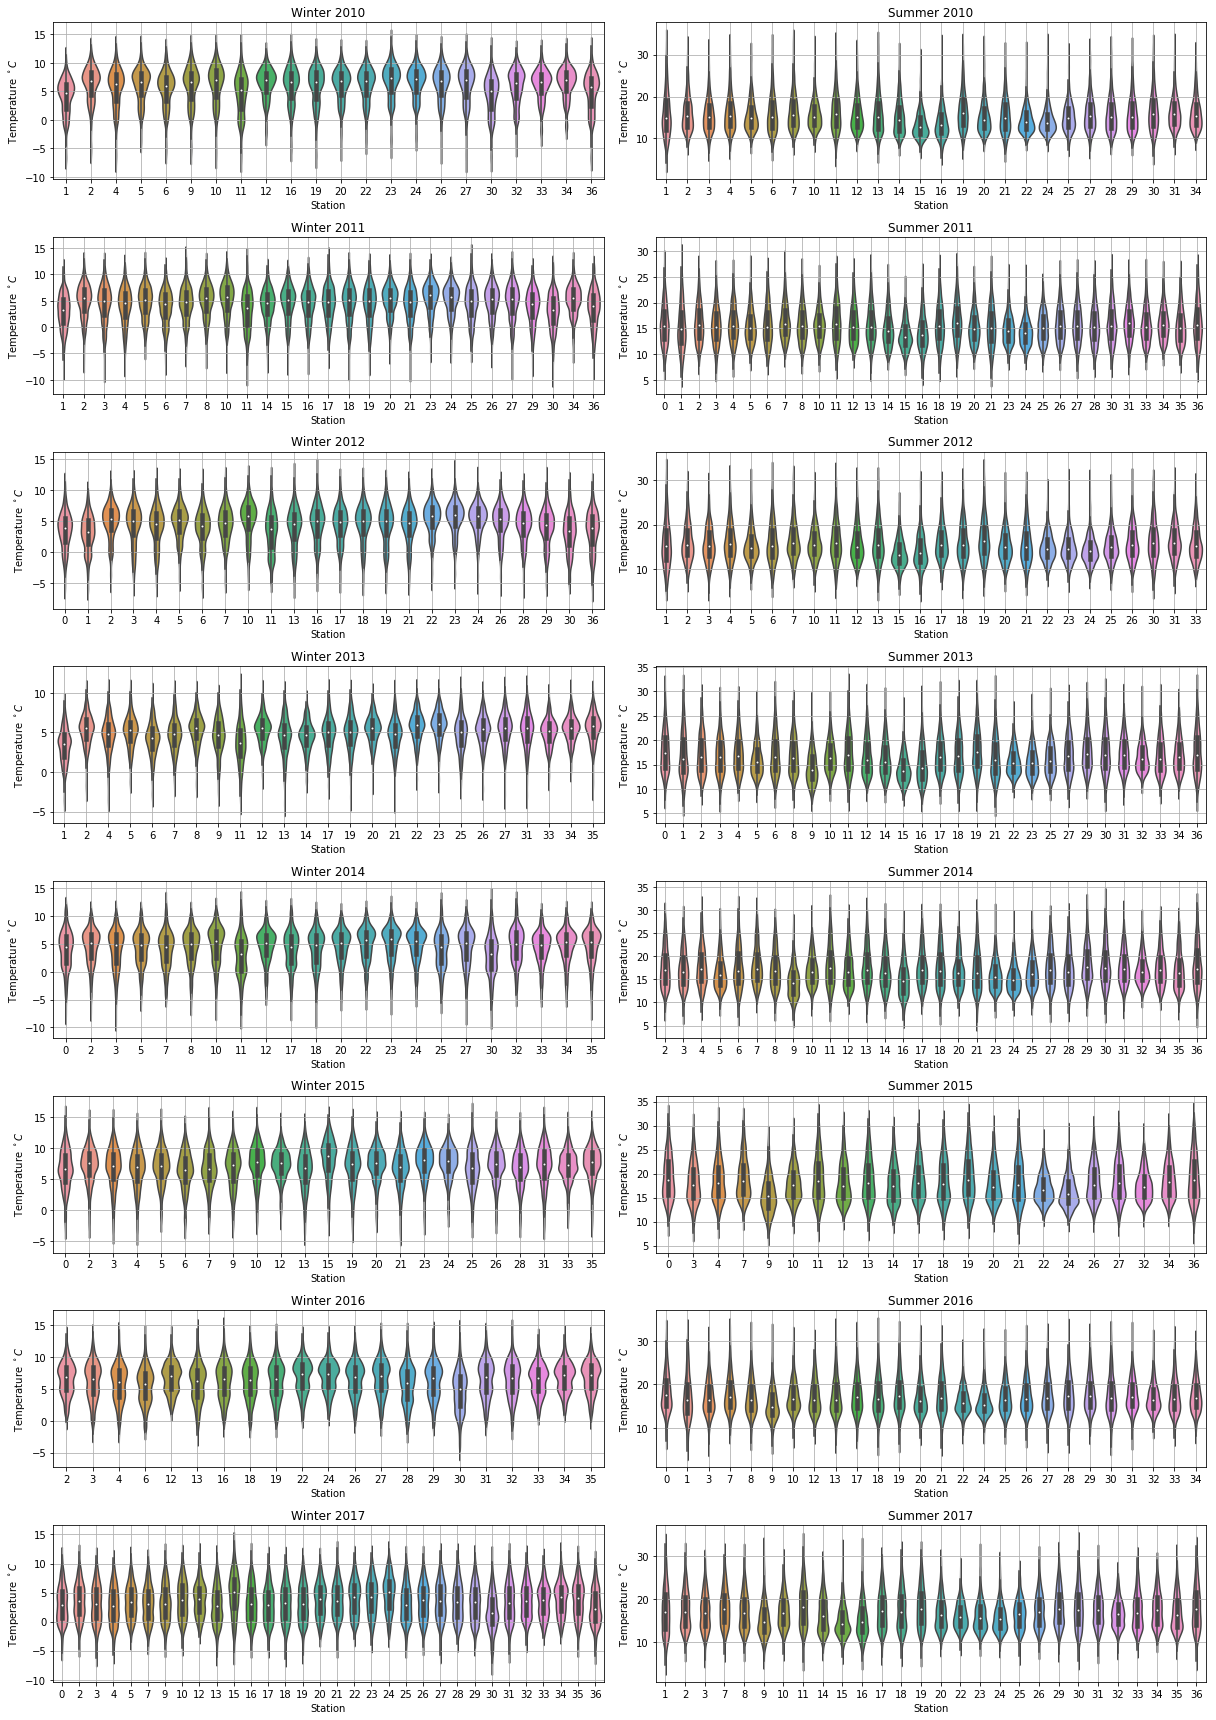

In [11]:
fig, ax = plt.subplots(8, 2, figsize=(17,24))

g1 = sns.violinplot(data=winter_df_2010, ax=ax[0][0])
g1.set_xticklabels(winter_stations_2010)

g2 = sns.violinplot(data=summer_df_2010, ax=ax[0][1])
g2.set_xticklabels(summer_stations_2010)

g3 = sns.violinplot(data=winter_df_2011, ax=ax[1][0])
g3.set_xticklabels(winter_stations_2011)

g4 = sns.violinplot(data=summer_df_2011, ax=ax[1][1])
g4.set_xticklabels(summer_stations_2011)

g5 = sns.violinplot(data=winter_df_2012, ax=ax[2][0])
g5.set_xticklabels(winter_stations_2012)

g6 = sns.violinplot(data=summer_df_2012, ax=ax[2][1])
g6.set_xticklabels(summer_stations_2012)

g7 = sns.violinplot(data=winter_df_2013, ax=ax[3][0])
g7.set_xticklabels(winter_stations_2013)

g8 = sns.violinplot(data=summer_df_2013, ax=ax[3][1])
g8.set_xticklabels(summer_stations_2013)


props_2013_sum = {'title': 'Summer 2013', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2012_sum = {'title': 'Summer 2012', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2011_sum = {'title': 'Summer 2011', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2010_sum = {'title': 'Summer 2010', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2013_wint = {'title': 'Winter 2013', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2012_wint = {'title': 'Winter 2012', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2011_wint = {'title': 'Winter 2011', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2010_wint = {'title': 'Winter 2010', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax[0][0].set(**props_2010_wint)
ax[1][0].set(**props_2011_wint)
ax[2][0].set(**props_2012_wint)
ax[3][0].set(**props_2013_wint)

ax[0][1].set(**props_2010_sum)
ax[1][1].set(**props_2011_sum)
ax[2][1].set(**props_2012_sum)
ax[3][1].set(**props_2013_sum)

g1 = sns.violinplot(data=winter_df_2014, ax=ax[4][0])
g1.set_xticklabels(winter_stations_2014)

g2 = sns.violinplot(data=summer_df_2014, ax=ax[4][1])
g2.set_xticklabels(summer_stations_2014)

g3 = sns.violinplot(data=winter_df_2015, ax=ax[5][0])
g3.set_xticklabels(winter_stations_2015)

g4 = sns.violinplot(data=summer_df_2015, ax=ax[5][1])
g4.set_xticklabels(summer_stations_2015)

g5 = sns.violinplot(data=winter_df_2016, ax=ax[6][0])
g5.set_xticklabels(winter_stations_2016)

g6 = sns.violinplot(data=summer_df_2016, ax=ax[6][1])
g6.set_xticklabels(summer_stations_2016)

g7 = sns.violinplot(data=winter_df_2017, ax=ax[7][0])
g7.set_xticklabels(winter_stations_2017)

g8 = sns.violinplot(data=summer_df_2017, ax=ax[7][1])
g8.set_xticklabels(summer_stations_2017)


props_2017_sum = {'title': 'Summer 2017', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2016_sum = {'title': 'Summer 2016', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2015_sum = {'title': 'Summer 2015', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2014_sum = {'title': 'Summer 2014', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2017_wint = {'title': 'Winter 2017', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2016_wint = {'title': 'Winter 2016', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2015_wint = {'title': 'Winter 2015', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2014_wint = {'title': 'Winter 2014', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax[4][0].set(**props_2014_wint)
ax[5][0].set(**props_2015_wint)
ax[6][0].set(**props_2016_wint)
ax[7][0].set(**props_2017_wint)

ax[4][1].set(**props_2014_sum)
ax[5][1].set(**props_2015_sum)
ax[6][1].set(**props_2016_sum)
ax[7][1].set(**props_2017_sum)
[a.grid() for a in ax.ravel()]


fig.tight_layout()


plt.savefig('plots/histo_all_station_2010_2017.png', dpi=200)
plt.show()

# Mean Temperature of Stations

## Winter

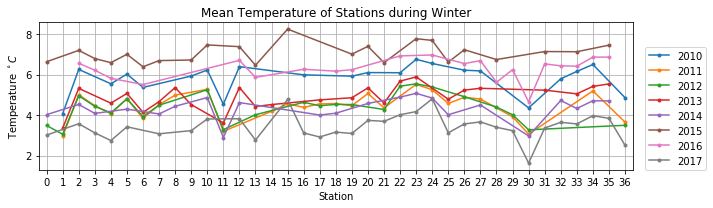

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))

for (stations, df) in zip(winter_stations, winter_dfs):
    year = df.iloc[-1].name.year
    ax.plot(stations, df.mean(), label=str(year), marker='.')
    
props = {'title': 'Mean Temperature of Stations during Winter', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax.set(**props)
ax.legend(loc=(1.02,0))

loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
ax.grid()
ax.set_xlim(-0.5,36.5)

fig.tight_layout()
plt.savefig('plots/winter_station_means.png', dpi=300)
plt.show()

## Summer

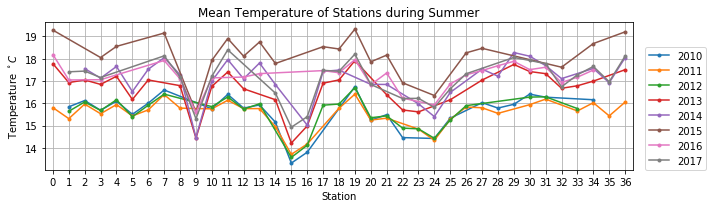

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))

for (stations, df) in zip(summer_stations, summer_dfs):
    year = df.iloc[-1].name.year
    ax.plot(stations, df.mean(), label=str(year), marker='.')
    
props = {'title': 'Mean Temperature of Stations during Summer', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax.set(**props)
ax.legend(loc=(1.02,0))

loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
ax.grid()
ax.set_xlim(-0.5,36.5)

fig.tight_layout()
plt.savefig('plots/summer_station_means.png', dpi=300)
plt.show()

# Standard Deviation of Stations

## Winter

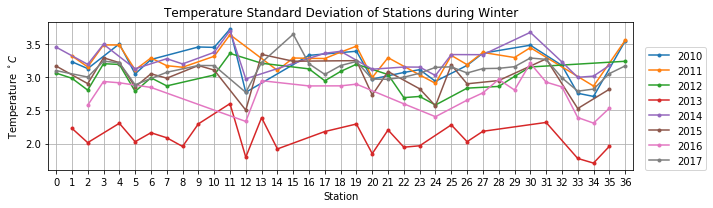

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))

for (stations, df) in zip(winter_stations, winter_dfs):
    year = df.iloc[-1].name.year
    ax.plot(stations, df.std(), label=str(year), marker='.')
    
props = {'title': 'Temperature Standard Deviation of Stations during Winter', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax.set(**props)
ax.legend(loc=(1.02,0))

loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
ax.grid()
ax.set_xlim(-0.5,36.5)

fig.tight_layout()
plt.savefig('plots/winter_station_stds.png', dpi=300)
plt.show()

## Summer

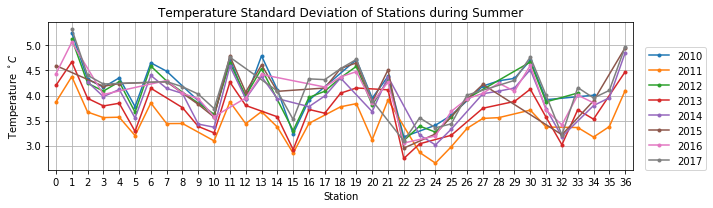

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))

for (stations, df) in zip(summer_stations, summer_dfs):
    year = df.iloc[-1].name.year
    ax.plot(stations, df.std(), label=str(year), marker='.')
    
props = {'title': 'Temperature Standard Deviation of Stations during Summer', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax.set(**props)
ax.legend(loc=(1.02,0))

loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
ax.grid()
ax.set_xlim(-0.5,36.5)

fig.tight_layout()
plt.savefig('plots/summer_station_stds.png', dpi=300)
plt.show()

# Analysis to Determine the Extremity of Each Station

For each line (aka each year) in the plots above, we calculate a mean value. The distance a point lies above or below that line determines how extreme it is. We then take the mean value of all these extremities. Do this for the year 2017.

## Create DataFrame 2017

### Winter

In [16]:
means_2017 = winter_df_2017.mean().values
stds_2017 = winter_df_2017.std().values
lons, lats = zip(*winter_df_2017.columns)

In [17]:
df__ = pd.DataFrame(data=[lons, lats, means_2017, stds_2017], index = ['Longitude', 'Latitude', 'Mean', 'Std']).T
df__.to_pickle('Dataframes/winter_2017_means_stds')
df__.head()

,Longitude,Latitude,Mean,Std
0,236.554,48.5745,3.013453,3.098062
1,236.679,48.4655,3.576065,3.001339
2,236.607,48.4608,3.123942,3.240337
3,236.514,48.4356,2.745913,3.215264
4,236.630,48.5273,3.424109,2.885131


### Summer

In [18]:
means_2017 = summer_df_2017.mean().values
stds_2017 = summer_df_2017.std().values
lons, lats = zip(*summer_df_2017.columns)

In [19]:
df__ = pd.DataFrame(data=[lons, lats, means_2017, stds_2017], index = ['Longitude', 'Latitude', 'Mean', 'Std']).T
df__.to_pickle('Dataframes/summer_2017_means_stds')
df__.head()

,Longitude,Latitude,Mean,Std
0,236.499,48.5376,17.412991,5.327235
1,236.679,48.4655,17.444977,4.403206
2,236.607,48.4608,17.157418,4.229878
3,236.543,48.6804,18.126891,4.277064
4,236.662,48.4562,17.184254,4.175599


This dataframe will be used by our plotting program.